**Importing libraries**

In [ ]:
import pandas as pd
import joblib
import pickle
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **players_21 dataset**

In [ ]:
players_21 = pd.read_csv('/content/drive/My Drive/Mid Sem Project/players_21.csv')

In [ ]:
players_21 = pd.DataFrame(players_21)

In [ ]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

In [ ]:
players_21

,sofifa_id,player_url,short_name,long_name,player_positions,...,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",...,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",...,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,...,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",...,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",...,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...
18939,257710,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,张梦炫,CB,...,https://cdn.sofifa.net/players/257/710/21_120.png,https://cdn.sofifa.net/teams/112165/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
18940,257933,https://sofifa.com/player/257933/wenzhuo-huang...,Huang Wenzhou,黄文卓,CM,...,https://cdn.sofifa.net/players/257/933/21_120.png,https://cdn.sofifa.net/teams/112540/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
18941,257936,https://sofifa.com/player/257936/yue-song/210002,Song Yue,宋岳,CM,...,https://cdn.sofifa.net/players/257/936/21_120.png,https://cdn.sofifa.net/teams/111774/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
18942,258736,https://sofifa.com/player/258736/vani-da-silva...,V. Da Silva,Ivanilson Loforte Tique Da Silva,ST,...,https://cdn.sofifa.net/players/258/736/21_120.png,https://cdn.sofifa.net/teams/1920/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png


In [ ]:
players_21.head()


,sofifa_id,player_url,short_name,long_name,player_positions,...,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",...,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",...,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,...,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",...,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",...,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [ ]:
players_21.set_index('short_name', inplace=True)


In [ ]:
players_21

,sofifa_id,player_url,long_name,player_positions,overall,...,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
short_name,,,,,,,,,,,
L. Messi,158023,https://sofifa.com/player/158023/lionel-messi/...,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,...,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
Cristiano Ronaldo,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,...,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
R. Lewandowski,188545,https://sofifa.com/player/188545/robert-lewand...,Robert Lewandowski,ST,91,...,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
Neymar Jr,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar da Silva Santos Júnior,"LW, CAM",91,...,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
K. De Bruyne,192985,https://sofifa.com/player/192985/kevin-de-bruy...,Kevin De Bruyne,"CAM, CM",91,...,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...
Zhang Mengxuan,257710,https://sofifa.com/player/257710/mengxuan-zhan...,张梦炫,CB,47,...,https://cdn.sofifa.net/players/257/710/21_120.png,https://cdn.sofifa.net/teams/112165/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
Huang Wenzhou,257933,https://sofifa.com/player/257933/wenzhuo-huang...,黄文卓,CM,47,...,https://cdn.sofifa.net/players/257/933/21_120.png,https://cdn.sofifa.net/teams/112540/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
Song Yue,257936,https://sofifa.com/player/257936/yue-song/210002,宋岳,CM,47,...,https://cdn.sofifa.net/players/257/936/21_120.png,https://cdn.sofifa.net/teams/111774/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png


In [ ]:
players_21.info()


<class 'pandas.core.frame.DataFrame'>
Index: 18944 entries, L. Messi to B. Hough
Columns: 109 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(49)
memory usage: 15.9+ MB


In [ ]:
players_21.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,...,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,18944.000000,18944.000000,18944.000000,1.870700e+04,18719.000000,...,18944.000000,18944.000000,18944.000000,18944.000000,2083.000000
mean,226232.328917,65.677787,71.086729,2.902288e+06,9148.482825,...,16.236486,16.103357,16.225982,16.551309,37.203553
std,27166.574284,7.002278,6.109985,7.743775e+06,19893.149956,...,16.845480,16.519399,17.017341,17.878121,10.714523
min,41.000000,47.000000,47.000000,9.000000e+03,500.000000,...,1.000000,1.000000,1.000000,1.000000,12.000000
25%,210028.750000,61.000000,67.000000,4.750000e+05,1000.000000,...,8.000000,8.000000,8.000000,8.000000,28.000000
50%,232301.500000,66.000000,71.000000,9.750000e+05,3000.000000,...,11.000000,11.000000,11.000000,11.000000,37.000000
75%,246745.750000,70.000000,75.000000,2.000000e+06,8000.000000,...,14.000000,14.000000,14.000000,14.000000,45.000000
max,258970.000000,93.000000,95.000000,1.855000e+08,560000.000000,...,92.000000,93.000000,91.000000,90.000000,65.000000


In [ ]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

In [ ]:
useless_columns = ['sofifa_id', 'player_url', 'dob', 'long_name', 'club_team_id', 'club_loaned_from',
                   'nationality_id', 'nation_team_id', 'player_tags', 'player_traits', 'real_face',
                   'player_face_url', 'club_logo_url', 'club_flag_url',
                   'nation_logo_url', 'nation_flag_url', 'club_jersey_number', 'nation_jersey_number', 'club_joined',
            'club_contract_valid_until']

In [ ]:
players_21 = players_21.drop(columns=useless_columns)

In [ ]:
players_21

,player_positions,overall,potential,value_eur,wage_eur,...,lcb,cb,rcb,rb,gk
short_name,,,,,,,,,,,
L. Messi,"RW, ST, CF",93,93,103500000.0,560000.0,...,52+3,52+3,52+3,62+3,19+3
Cristiano Ronaldo,"ST, LW",92,92,63000000.0,220000.0,...,54+3,54+3,54+3,61+3,20+3
R. Lewandowski,ST,91,91,111000000.0,240000.0,...,60+3,60+3,60+3,61+3,19+3
Neymar Jr,"LW, CAM",91,91,132000000.0,270000.0,...,49+3,49+3,49+3,62+3,20+3
K. De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,...,69+3,69+3,69+3,75+3,21+3
...,...,...,...,...,...,...,...,...,...,...,...
Zhang Mengxuan,CB,47,52,70000.0,1000.0,...,47+2,47+2,47+2,45+2,15+2
Huang Wenzhou,CM,47,53,70000.0,1000.0,...,46+2,46+2,46+2,47+2,15+2
Song Yue,CM,47,47,45000.0,2000.0,...,46+1,46+1,46+1,47,11+2


In [ ]:
threshold = len(players_21) * 0.7
players_21 = players_21.dropna(thresh=threshold, axis=1)

In [ ]:
players_21

,player_positions,overall,potential,value_eur,wage_eur,...,lcb,cb,rcb,rb,gk
short_name,,,,,,,,,,,
L. Messi,"RW, ST, CF",93,93,103500000.0,560000.0,...,52+3,52+3,52+3,62+3,19+3
Cristiano Ronaldo,"ST, LW",92,92,63000000.0,220000.0,...,54+3,54+3,54+3,61+3,20+3
R. Lewandowski,ST,91,91,111000000.0,240000.0,...,60+3,60+3,60+3,61+3,19+3
Neymar Jr,"LW, CAM",91,91,132000000.0,270000.0,...,49+3,49+3,49+3,62+3,20+3
K. De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,...,69+3,69+3,69+3,75+3,21+3
...,...,...,...,...,...,...,...,...,...,...,...
Zhang Mengxuan,CB,47,52,70000.0,1000.0,...,47+2,47+2,47+2,45+2,15+2
Huang Wenzhou,CM,47,53,70000.0,1000.0,...,46+2,46+2,46+2,47+2,15+2
Song Yue,CM,47,47,45000.0,2000.0,...,46+1,46+1,46+1,47,11+2


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
players_21.isna().any()

player_positions               False
overall                        False
potential                      False
value_eur                       True
wage_eur                        True
age                            False
height_cm                      False
weight_kg                      False
club_name                       True
league_name                     True
league_level                    True
club_position                   True
nationality_name               False
preferred_foot                 False
weak_foot                      False
skill_moves                    False
international_reputation       False
work_rate                      False
body_type                      False
release_clause_eur              True
pace                            True
shooting                        True
passing                         True
dribbling                       True
defending                       True
physic                          True
attacking_crossing             False
a

In [ ]:

cat_cols = ['club_name', 'league_name', 'club_position']

In [ ]:
players_21[cat_cols] = players_21[cat_cols].fillna("Unknown")


<ipython-input-21-846823ea7a27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_21[cat_cols] = players_21[cat_cols].fillna("Unknown")


In [ ]:
num_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
knn_imputer = KNNImputer(n_neighbors=3)

In [ ]:
num_cols = ['value_eur', 'wage_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']

In [ ]:
players_21[num_cols] = knn_imputer.fit_transform(players_21[num_cols])

<ipython-input-24-8a07c89da7e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_21[num_cols] = knn_imputer.fit_transform(players_21[num_cols])


In [ ]:
players_21['release_clause_eur'].fillna(0, inplace=True)

<ipython-input-25-3d4692dfeece>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_21['release_clause_eur'].fillna(0, inplace=True)


In [ ]:
players_21['league_level'].fillna(0, inplace=True)

<ipython-input-26-4b9fb2fd0846>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_21['league_level'].fillna(0, inplace=True)


In [ ]:
players_21.isna().any()

player_positions               False
overall                        False
potential                      False
value_eur                      False
wage_eur                       False
age                            False
height_cm                      False
weight_kg                      False
club_name                      False
league_name                    False
league_level                   False
club_position                  False
nationality_name               False
preferred_foot                 False
weak_foot                      False
skill_moves                    False
international_reputation       False
work_rate                      False
body_type                      False
release_clause_eur             False
pace                           False
shooting                       False
passing                        False
dribbling                      False
defending                      False
physic                         False
attacking_crossing             False
a

In [ ]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

In [ ]:
categorical = ['player_positions', 'club_name', 'league_name', 'club_position', 'nationality_name', 'preferred_foot', 'work_rate', 'body_type']


In [ ]:
scaler = StandardScaler()

In [ ]:
#Columns probably containing + or -


columns1 = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram',
            'lm','lcm','cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb',
            'lb','lcb','cb','rcb','rb', 'gk']

In [ ]:
#Dropping values after + or -
for col in columns1:
    players_21[col] = players_21[col].str.split('+', n = 1, expand = True)[0]
    players_21[col] = players_21[col].str.split('-', n = 1, expand = True)[0]
players_21[columns1] = players_21[columns1].apply(pd.to_numeric, errors='coerce')


<ipython-input-32-d937a71d4f08>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_21[col] = players_21[col].str.split('+', n = 1, expand = True)[0]
<ipython-input-32-d937a71d4f08>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_21[col] = players_21[col].str.split('-', n = 1, expand = True)[0]
<ipython-input-32-d937a71d4f08>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [ ]:
#Making players' postion only their main position instead of several

players_21['player_positions'] = players_21['player_positions'].apply(lambda x: x.split(',')[0].strip())

unique_positions = players_21['player_positions'].unique()
unique_positions

#https://www.kaggle.com/code/alefernandezarmas/fifa-22-player-overall-predictions?scriptVersionId=129277545&cellId=62

<ipython-input-33-29ef412558b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_21['player_positions'] = players_21['player_positions'].apply(lambda x: x.split(',')[0].strip())


array(['RW', 'ST', 'LW', 'CAM', 'GK', 'CB', 'CF', 'CDM', 'CM', 'LM', 'LB',
       'RB', 'RM', 'RWB', 'LWB'], dtype=object)

In [ ]:
players_21

,player_positions,overall,potential,value_eur,wage_eur,...,lcb,cb,rcb,rb,gk
short_name,,,,,,,,,,,
L. Messi,RW,93,93,103500000.0,560000.0,...,52,52,52,62,19
Cristiano Ronaldo,ST,92,92,63000000.0,220000.0,...,54,54,54,61,20
R. Lewandowski,ST,91,91,111000000.0,240000.0,...,60,60,60,61,19
Neymar Jr,LW,91,91,132000000.0,270000.0,...,49,49,49,62,20
K. De Bruyne,CAM,91,91,129000000.0,370000.0,...,69,69,69,75,21
...,...,...,...,...,...,...,...,...,...,...,...
Zhang Mengxuan,CB,47,52,70000.0,1000.0,...,47,47,47,45,15
Huang Wenzhou,CM,47,53,70000.0,1000.0,...,46,46,46,47,15
Song Yue,CM,47,47,45000.0,2000.0,...,46,46,46,47,11


**Exploratory Data Analysis**

In [ ]:
players_21.describe()

,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk
count,18944.000000,18944.000000,1.894400e+04,18944.000000,18944.000000,...,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000
mean,65.677787,71.086729,2.914698e+06,9185.137131,25.225823,...,52.289168,52.289168,52.289168,53.276077,21.333087
std,7.002278,6.109985,7.718156e+06,19833.602177,4.697354,...,14.837976,14.837976,14.837976,14.013210,15.172078
min,47.000000,47.000000,9.000000e+03,500.000000,16.000000,...,16.000000,16.000000,16.000000,14.000000,9.000000
25%,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,...,42.000000,42.000000,42.000000,46.000000,15.000000
50%,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,...,55.000000,55.000000,55.000000,56.000000,16.000000
75%,70.000000,75.000000,2.100000e+06,9000.000000,29.000000,...,64.000000,64.000000,64.000000,63.000000,18.000000
max,93.000000,95.000000,1.855000e+08,560000.000000,53.000000,...,89.000000,89.000000,89.000000,84.000000,89.000000


Correlation Matrix

<ipython-input-36-c643cae8417f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = players_21.corr()


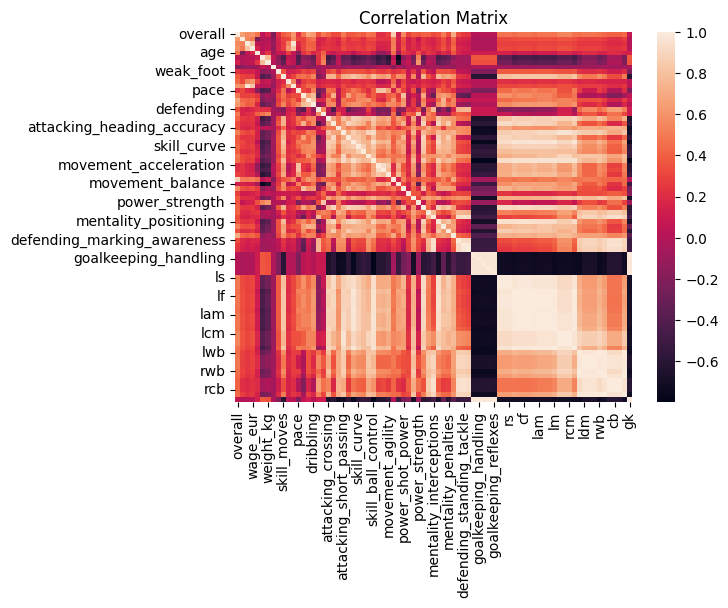

In [ ]:
corr_matrix = players_21.corr()
sns.heatmap(corr_matrix)
plt.title('Correlation Matrix')
plt.show()


Overall rating distribution

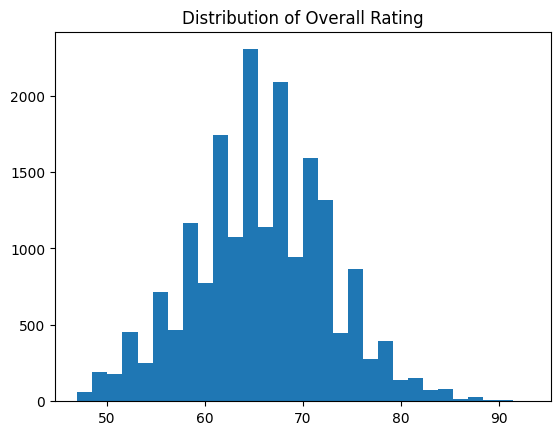

In [ ]:

plt.hist(players_21['overall'], bins=30)
plt.title('Distribution of Overall Rating')
plt.show()


Ages of players

In [ ]:
players_21.sort_values(by='overall',ascending=False)[["overall","age"]].head(20)

,overall,age
short_name,,
L. Messi,93,33
Cristiano Ronaldo,92,35
R. Lewandowski,91,31
Neymar Jr,91,28
K. De Bruyne,91,29
...,...,...
M. Neuer,89,34
T. Courtois,89,28
Casemiro,89,28


Nationalities of Players

In [ ]:
players_21 = pd.get_dummies(players_21, columns=categorical)

In [ ]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)

In [ ]:
players_21

overall  potential    value_eur  wage_eur  age  height_cm  \
short_name                                                                     
L. Messi                93         93  103500000.0  560000.0   33        170   
Cristiano Ronaldo       92         92   63000000.0  220000.0   35        187   
R. Lewandowski          91         91  111000000.0  240000.0   31        184   
Neymar Jr               91         91  132000000.0  270000.0   28        175   
K. De Bruyne            91         91  129000000.0  370000.0   29        181   
...                    ...        ...          ...       ...  ...        ...   
Zhang Mengxuan          47         52      70000.0    1000.0   21        177   
Huang Wenzhou           47         53      70000.0    1000.0   21        174   
Song Yue                47         47      45000.0    2000.0   28        185   
V. Da Silva             47         67     130000.0     500.0   17        171   
B. Hough                47         67     130000.0     500.0   17        175   

                   weight_kg  league_level  weak_foot  skill_moves  \
short_name                                                           
L. Messi                  72           1.0          4            4   
Cristiano Ronaldo         83           1.0          4            5   
R. Lewandowski            80           1.0          4            4   
Neymar Jr                 68           1.0          5            5   
K. De Bruyne              70           1.0          5            4   
...                      ...           ...        ...          ...   
Zhang Mengxuan            70           1.0          2            2   
Huang Wenzhou             68           1.0          2            2   
Song Yue                  79           1.0          2            2   
V. Da Silva               58           4.0          2            2   
B. Hough                  65           4.0          2            2   

                   international_reputation  release_clause_eur  pace  \
short_name                                                              
L. Messi                                  5         138400000.0  85.0   
Cristiano Ronaldo                         5          75900000.0  89.0   
R. Lewandowski                            4         132000000.0  78.0   
Neymar Jr                                 5         166500000.0  91.0   
K. De Bruyne                              4         161000000.0  76.0   
...                                     ...                 ...   ...   
Zhang Mengxuan                            1             57000.0  58.0   
Huang Wenzhou                             1             72000.0  58.0   
Song Yue                                  1             47000.0  65.0   
V. Da Silva                               1            165000.0  70.0   
B. Hough                                  1            165000.0  64.0   

                   shooting  passing  dribbling  defending  physic  \
short_name                                                           
L. Messi               92.0     91.0       95.0       38.0    65.0   
Cristiano Ronaldo      93.0     81.0       89.0       35.0    77.0   
R. Lewandowski         91.0     78.0       85.0       43.0    82.0   
Neymar Jr              85.0     86.0       94.0       36.0    59.0   
K. De Bruyne           86.0     93.0       88.0       64.0    78.0   
...                     ...      ...        ...        ...     ...   
Zhang Mengxuan         23.0     26.0       27.0       50.0    48.0   
Huang Wenzhou          32.0     49.0       47.0       43.0    48.0   
Song Yue               37.0     49.0       46.0       40.0    59.0   
V. Da Silva            46.0     40.0       53.0       16.0    40.0   
B. Hough               40.0     48.0       49.0       35.0    45.0   

                   attacking_crossing  attacking_finishing  \
short_name                                                   
L. Messi                           85                   95   
Cristiano Ronaldo   

In [ ]:
y = players_21['overall']

In [ ]:
players_21_scaled = pd.DataFrame(scaler.fit_transform(players_21), columns=players_21.columns)

In [ ]:
X = players_21_scaled.drop('overall', axis=1)

In [ ]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)

In [ ]:
players_21_scaled

overall  potential  value_eur   wage_eur       age  height_cm  \
0      3.902006   3.586563  13.032642  27.772535  1.655055  -1.639556   
1      3.759192   3.422893   7.785136  10.629457  2.080838   0.851107   
2      3.616378   3.259222  14.004402  11.637874  1.229273   0.411579   
3      3.616378   3.259222  16.725331  13.150498  0.590598  -0.907008   
4      3.616378   3.259222  16.336627  18.192580  0.803490  -0.027950   
...         ...        ...        ...        ...       ...        ...   
18939 -2.667458  -3.123941  -0.368582  -0.412701 -0.899642  -0.613988   
18940 -2.667458  -2.960270  -0.368582  -0.412701 -0.899642  -1.053517   
18941 -2.667458  -3.942295  -0.371821  -0.362280  0.590598   0.558088   
18942 -2.667458  -0.668878  -0.360808  -0.437912 -1.751207  -1.493046   
18943 -2.667458  -0.668878  -0.360808  -0.437912 -1.751207  -0.907008   

       weight_kg  league_level  weak_foot  skill_moves  \
0      -0.427506     -0.453019   1.594026     2.135802   
1       1.131240     -0.453019   1.594026     3.440521   
2       0.706127     -0.453019   1.594026     2.135802   
3      -0.994323     -0.453019   3.093020     3.440521   
4      -0.710915     -0.453019   3.093020     2.135802   
...          ...           ...        ...          ...   
18939  -0.710915     -0.453019  -1.403962    -0.473636   
18940  -0.994323     -0.453019  -1.403962    -0.473636   
18941   0.564423     -0.453019  -1.403962    -0.473636   
18942  -2.411365      3.551644  -1.403962    -0.473636   
18943  -1.419436      3.551644  -1.403962    -0.473636   

       international_reputation  release_clause_eur      pace  shooting  \
0                     10.801035           13.653492  1.614977  2.937920   
1                     10.801035            7.300870  1.967395  3.011949   
2                      8.037314           13.002983  0.998245  2.863890   
3                     10.801035           16.509630  2.143604  2.419714   
4                      8.037314           15.950600  0.822036  2.493743   
...                         ...                 ...       ...       ...   
18939                 -0.253847           -0.407960 -0.763846 -2.170111   
18940                 -0.253847           -0.406435 -0.763846 -1.503846   
18941                 -0.253847           -0.408976 -0.147114 -1.133699   
18942                 -0.253847           -0.396982  0.293409 -0.467434   
18943                 -0.253847           -0.396982 -0.235218 -0.911611   

        passing  dribbling  defending    physic  attacking_crossing  \
0      3.378717   3.356369  -0.870833  0.032336            1.949428   
1      2.374934   2.739464  -1.060540  1.308247            1.894339   
2      2.073799   2.328194  -0.554654  1.839877            1.178188   
3      2.876826   3.253552  -0.997305 -0.605620            1.949428   
4      3.579473   2.636646   0.773297  1.414573            2.445225   
...         ...        ...        ...       ...                 ...   
18939 -3.145870  -3.635224  -0.112004 -1.775205           -1.466065   
18940 -0.837170  -1.578873  -0.554654 -1.775205           -0.639736   
18941 -0.837170  -1.681691  -0.744362 -0.605620           -0.309205   
18942 -1.740574  -0.961968  -2.262020 -2.625813           -1.245711   
18943 -0.937548  -1.373238  -1.060540 -2.094183           -0.639736   

       attacking_finishing  attacking_heading_accuracy  \
0                 2.511461                    1.046427   
1                 2.511461                    2.201078   
2                 2.460419                    1.912415   
3                 2.103126                    0.584566   
4                 1.847916                    0.180439   
...                    ...                         ...   
18939            -1.520848                   -0.396887   
18940            -0.806262                   -0.570085   
18941            -0.704178                   -0.454619   
18942             0.061450                   -0.916480   
18943            -0.193759                

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

## **players_22 dataset**

**Data Loading and Exploration**

In [ ]:
players_22 = pd.read_csv('/content/drive/My Drive/Mid Sem Project/players_22.csv')

<ipython-input-49-d2a396bd6e92>:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players_22 = pd.read_csv('/content/drive/My Drive/Mid Sem Project/players_22.csv')


In [ ]:
players_22 = pd.DataFrame(players_22)

In [ ]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

In [ ]:
players_22

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


In [ ]:
players_22.head()


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png


In [ ]:
players_22.set_index('short_name', inplace=True)


In [ ]:
players_22

,sofifa_id,player_url,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
short_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
L. Messi,158023,https://sofifa.com/player/158023/lionel-messi/...,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,72,73.0,Paris Saint-Germain,French Ligue 1,1.0,RW,30.0,NaN,2021-08-10,2023.0,52,Argentina,1369.0,RW,10.0,Left,4,4,5,Medium/Low,Unique,Yes,144300000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...","Finesse Shot, Long Shot Taker (AI), Playmaker ...",85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
R. Lewandowski,188545,https://sofifa.com/player/188545/robert-lewand...,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,81,21.0,FC Bayern München,German 1. Bundesliga,1.0,ST,9.0,NaN,2014-07-01,2023.0,37,Poland,1353.0,RS,9.0,Right,4,4,5,High/Medium,Unique,Yes,197200000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Solid Player, Finesse Shot, Outside Foot Shot,...",78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
Cristiano Ronaldo,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,83,11.0,Manchester United,English Premier League,1.0,ST,7.0,NaN,2021-08-27,2023.0,38,Portugal,1354.0,ST,7.0,Right,4,5,5,High/Low,Unique,Yes,83300000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...","Power Free-Kick, Flair, Long Shot Taker (AI), ...",87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.so

In [ ]:
players_22.info()


<class 'pandas.core.frame.DataFrame'>
Index: 19239 entries, L. Messi to E. Lalchhanchhuaha
Columns: 109 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(49)
memory usage: 16.1+ MB


In [ ]:
players_22.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,club_contract_valid_until,nationality_id,nation_team_id,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,19178.000000,19178.000000,19239.000000,759.000000,759.000000,19239.000000,19239.000000,19239.000000,1.806300e+04,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,20.945250,2022.764000,58.602682,14480.848485,12.567852,2.946151,2.352461,1.094184,5.374044e+06,68.213071,52.345297,57.312562,62.561174,51.703630,64.823289,49.577421,45.894433,51.783877,58.867977,42.463849,55.660429,47.268933,42.249025,53.072249,58.472010,64.652893,64.714902,63.500078,61.450023,64.068611,57.776860,64.813504,63.084880,65.007745,46.642705,55.538957,46.613545,50.330215,53.964603,47.858724,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,17.909369,1.213203,50.298614,35328.730217,7.039116,0.671560,0.767659,0.371098,1.494837e+07,10.933155,14.051623,10.068965,9.651312,16.189746,9.791886,18.034661,19.721023,17.294183,14.490858,17.653329,18.784590,18.181085,17.178590,15.026569,16.663722,15.167399,14.965426,14.862285,9.042281,14.324789,13.192224,12.122977,16.145279,12.663518,19.411583,16.972181,20.677077,19.621601,13.650481,15.768583,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,1.000000,2021.000000,1.000000,1318.000000,1.000000,1.000000,1.000000,1.000000,1.600000e+04,28.000000,18.000000,25.000000,27.000000,14.000000,29.000000,6.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,9.000000,8.000000,14.000000,15.000000,18.000000,25.000000,15.000000,20.000000,22.000000,12.000000,19.000000,4.000000,10.000000,3.000000,2.000000,10.000000,7.000000,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,9.000000,2022.000000,21.000000,1338.000000,7.000000,3.000000,2.000000,1.000000,8.060000e+05,62.000000,42.000000,51.000000,57.000000,37.000000,59.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,35.000000,31.000000,44.000000,55.000000,57.000000,58.000000,55.000000,56.000

**Data Cleaning**

In [ ]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

In [ ]:
players_22 = players_22.drop(columns=useless_columns)

In [ ]:
players_22

,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,league_name,league_level,club_position,nationality_name,nation_position,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
short_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
L. Messi,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,72,Paris Saint-Germain,French Ligue 1,1.0,RW,Argentina,RW,Left,4,4,5,Medium/Low,Unique,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,NaN,89+3,89+3,89+3,92,93,93,93,92,93,93,93,91+2,87+3,87+3,87+3,91+2,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
R. Lewandowski,ST,92,92,119500000.0,270000.0,32,185,81,FC Bayern München,German 1. Bundesliga,1.0,ST,Poland,RS,Right,4,4,5,High/Medium,Unique,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,NaN,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,86+3,84+3,80+3,80+3,80+3,84+3,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
Cristiano Ronaldo,"ST, LW",91,91,45000000.0,270000.0,36,187,83,Manchester United,English Premier League,1.0,ST,Portugal,ST,Right,4,5,5,High/Low,Unique,83300000.0,87.0,94.0,80.0,88.0,34.0,75.0,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,NaN,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
Neymar Jr,"LW, CAM",91,91,129000000.0,270000.0,29,175,68,Paris Saint-Germain,French Ligue 1,1.0,LW,Brazil,NaN,Right,5,5,5,High/Medium,Unique,238700000.0,91.0,83.0,86.0,94.0,37.0,63.0,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,NaN,83+3,83+3,83+3,90,88,88,88,90,89+2,89+2,89+2,89+2,82+3,82+3,82+3,89+2,67+3,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
K. De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181,70,Manchester City,English Premier League,1.0,RCM,Belgium,RCM,Right,5,4,4,High/High,Unique,232200000.0,76.0,86.0,93.0,88.0,64.0,78.0,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,NaN,83+3,83+3,83+3,88,87,87,87,88,89+2,89+2,89+2,89+2,89+2,89+2,89+2,89+2,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Song Defu,CDM,47,52,70000.0,1000.0,22,180,64,Wuhan FC,Chinese Super League,1.0,SUB,China PR,NaN,Right,3,2,1,Medium/Medium,Lean (170-185),114000.0,58.0,35.0,46.0,48.0,42.0,49.0,46,32,48,50,30,45,33,38,48,49,56,60,55,53,70,46,62,51,46,30,52,42,38,43,42,37,38,43,48,6,10,5,15,13,NaN,44+2,44+2,44+2,46,45,45,45,46,46+2,46+2,46+2,47+2,46+2,46+2,46+2,47+2,48+2,46+2,46+2,46+2,

In [ ]:

players_22 = players_22.dropna(thresh=threshold, axis=1)

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
players_22.isna().any()

player_positions               False
overall                        False
potential                      False
value_eur                       True
wage_eur                        True
age                            False
height_cm                      False
weight_kg                      False
club_name                       True
league_name                     True
league_level                    True
club_position                   True
nationality_name               False
preferred_foot                 False
weak_foot                      False
skill_moves                    False
international_reputation       False
work_rate                      False
body_type                      False
release_clause_eur              True
pace                            True
shooting                        True
passing                         True
dribbling                       True
defending                       True
physic                          True
attacking_crossing             False
a

In [ ]:
players_22[cat_cols] = players_22[cat_cols].fillna("Unknown")


<ipython-input-64-afaeade1f496>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_22[cat_cols] = players_22[cat_cols].fillna("Unknown")


In [ ]:
players_22[num_cols] = knn_imputer.fit_transform(players_22[num_cols])

<ipython-input-65-33e7faee2d05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_22[num_cols] = knn_imputer.fit_transform(players_22[num_cols])


In [ ]:
players_22['release_clause_eur'].fillna(0, inplace=True)

<ipython-input-66-198f8e14585b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_22['release_clause_eur'].fillna(0, inplace=True)


In [ ]:
players_22['league_level'].fillna(0, inplace=True)

<ipython-input-67-89c5b2f6ed60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_22['league_level'].fillna(0, inplace=True)


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
players_22.isna().any()

player_positions               False
overall                        False
potential                      False
value_eur                      False
wage_eur                       False
age                            False
height_cm                      False
weight_kg                      False
club_name                      False
league_name                    False
league_level                   False
club_position                  False
nationality_name               False
preferred_foot                 False
weak_foot                      False
skill_moves                    False
international_reputation       False
work_rate                      False
body_type                      False
release_clause_eur             False
pace                           False
shooting                       False
passing                        False
dribbling                      False
defending                      False
physic                         False
attacking_crossing             False
a

In [ ]:
#Dropping values after + or -
for col in columns1:
    players_22[col] = players_22[col].str.split('+', n = 1, expand = True)[0]
    players_22[col] = players_22[col].str.split('-', n = 1, expand = True)[0]

<ipython-input-70-73e4033c5004>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_22[col] = players_22[col].str.split('+', n = 1, expand = True)[0]
<ipython-input-70-73e4033c5004>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_22[col] = players_22[col].str.split('-', n = 1, expand = True)[0]


In [ ]:
#Making players' postion only their main position instead of several

players_22['player_positions'] = players_22['player_positions'].apply(lambda x: x.split(',')[0].strip())

unique_positions = players_22['player_positions'].unique()
unique_positions

#https://www.kaggle.com/code/alefernandezarmas/fifa-22-player-overall-predictions?scriptVersionId=129277545&cellId=62

<ipython-input-71-6b4f76e5cbf6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_22['player_positions'] = players_22['player_positions'].apply(lambda x: x.split(',')[0].strip())


array(['RW', 'ST', 'LW', 'CM', 'GK', 'CDM', 'CF', 'LM', 'CB', 'CAM', 'LB',
       'RB', 'RM', 'LWB', 'RWB'], dtype=object)

In [ ]:
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', None)

In [ ]:
players_22

,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,league_name,league_level,club_position,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
short_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
L. Messi,RW,93,93,78000000.0,320000.0,34,170,72,Paris Saint-Germain,French Ligue 1,1.0,RW,Argentina,Left,4,4,5,Medium/Low,Unique,144300000.0,85.0,92.0,91.0,95.0,34.0,65.0,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,89,89,89,92,93,93,93,92,93,93,93,91,87,87,87,91,66,64,64,64,66,61,50,50,50,61,19
R. Lewandowski,ST,92,92,119500000.0,270000.0,32,185,81,FC Bayern München,German 1. Bundesliga,1.0,ST,Poland,Right,4,4,5,High/Medium,Unique,197200000.0,78.0,92.0,79.0,86.0,44.0,82.0,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,90,90,90,85,88,88,88,85,86,86,86,84,80,80,80,84,64,66,66,66,64,61,60,60,60,61,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L. Rudden,ST,47,60,110000.0,500.0,19,173,66,Finn Harps,Rep. Ireland Airtricity League,1.0,RES,Republic of Ireland,Right,3,2,1,Medium/Medium,Lean (170-185),239000.0,68.0,46.0,36.0,48.0,15.0,42.0,29,49,40,38,34,42,36,34,33,45,69,67,72,48,73,48,50,50,40,41,34,14,47,40,49,47,10,14,11,7,10,7,14,15,47,47,47,47,47,47,47,47,45,45,45,45,39,39,39,45,33,29,29,29,33,32,26,26,26,32,15
E. Lalchhanchhuaha,CAM,47,60,110000.0,500.0,19,167,61,NorthEast United FC,Indian Super League,1.0,SUB,India,Right,3,2,1,Medium/Medium,Lean (170-),217000.0,68.0,38.0,45.0,48.0,36.0,48.0,39,32,46,50,37,48,38,32,49,38,70,67,65,54,85,50,62,57,40,36,55,42,47,46,35,36,33,31,37,8,13,13,9,14,45,45,45,47,47,47,47,47,47,47,47,48,46,46,46,48,45,44,44,44,45,45,41,41,41,45,16


**Exploratory Data Analysis**

In [ ]:
players_22.describe()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,19239.000000,19239.00000,1.923900e+04,19239.000000,19239.000000,19239.000000,19239.000000,19239.00000,19239.000000,19239.000000,19239.000000,1.923900e+04,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.00000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.00000,19239.000000,19239.00000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.00000,19239.000000,19239.000000,19239.0000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000
mean,65.772182,71.07937,2.852674e+06,9028.235732,25.210822,181.299704,74.943032,1.35007,2.946151,2.352461,1.094184,5.045551e+06,67.176311,52.371438,57.395871,62.425307,52.018242,65.080821,49.577421,45.894433,51.783877,58.867977,42.463849,55.660429,47.268933,42.249025,53.072249,58.47201,64.652893,64.714902,63.500078,61.450023,64.068611,57.77686,64.813504,63.08488,65.007745,46.642705,55.538957,46.613545,50.330215,53.964603,47.858724,57.92983,46.601746,48.045584,45.9067,16.406102,16.192474,16.055356,16.229274,16.491814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75%,70.000000,75.00000,2.050000e+06,8000.000000,29.000000,186.000000,80.000000,1.00000,3.000000,3.000000,1.000000,3.400000e+06,75.000000,63.000000,64.000000,69.000000,64.000000,72.000000,63.000000,62.000000,64.000000,68.000000,56.000000,68.000000,61.000000,55.000000,64.000000,69.00000,75.000000,75.000000,74.000000,67.000000,74.000000,68.00000,73.000000,74.00000,74.000000,62.000000,68.000000,64.000000,64.000000,64.000000,60.000000,66.00000,63.000000,65.000000,63.0000,14.000000,14.000000,14.000000,14.000000,14.000000
max,93.000000,95.00000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,5.00000,5.000000,5.000000,5.000000,3.735000e+08,97.000000,94.000000,93.000000,95.000000,91.000000,90.000000,94.000000,95.000000,93.000000,94.000000,90.000000,96.000000,94.000000,94.000000,93.000000,96.00000,97.000000,97.000000,96.000000,94.000000,96.000000,95.00000,95.000000,97.00000,97.000000,94.000000,95.000000,91.000000,96.000000,95.000000,93.000000,96.00000,93.000000,93.000000,92.0000,91.000000,92.000000,93.000000,92.000000,90.000000


Correlation Matrix

<ipython-input-75-0a176d8b979c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_22 = players_22.corr()


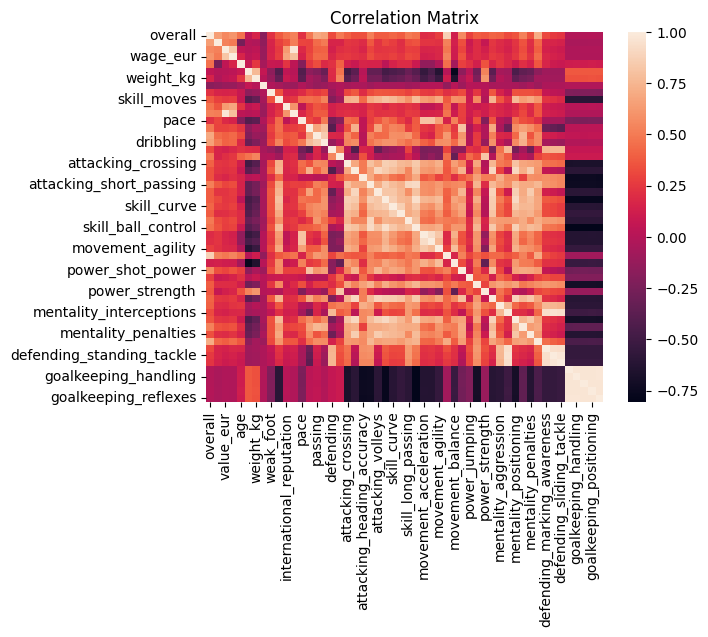

In [ ]:
corr_matrix_22 = players_22.corr()
sns.heatmap(corr_matrix_22)
plt.title('Correlation Matrix')
plt.show()


Overall rating distribution

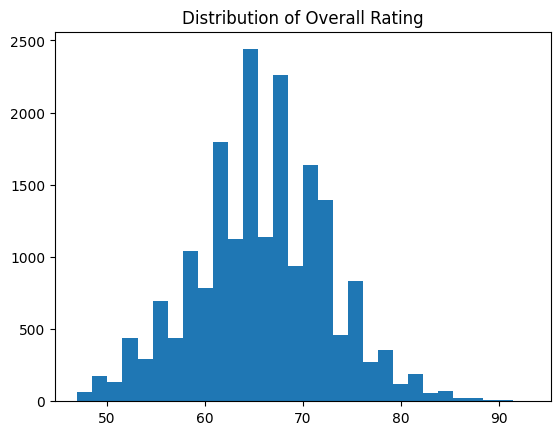

In [ ]:

plt.hist(players_22['overall'], bins=30)
plt.title('Distribution of Overall Rating')
plt.show()


Ages of players

In [ ]:
players_22.sort_values(by='overall',ascending=False)[["overall","age"]].head(20)

,overall,age
short_name,,
L. Messi,93,34
R. Lewandowski,92,32
...,...,...
K. Benzema,89,33
H. Son,89,28


In [ ]:
players_22 = pd.get_dummies(players_22, columns=categorical)

In [ ]:
y_22 = players_22['overall']

In [ ]:
y_22

short_name
L. Messi              93
R. Lewandowski        92
                      ..
L. Rudden             47
E. Lalchhanchhuaha    47
Name: overall, Length: 19239, dtype: int64

In [ ]:
players_22_scaled = pd.DataFrame(scaler.fit_transform(players_22), columns=players_22.columns)

In [ ]:
players_22_scaled

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_positions_CAM,player_positions_CB,player_positions_CDM,player_positions_CF,player_positions_CM,player_positions_GK,player_positions_LB,player_positions_LM,player_positions_LW,player_positions_LWB,player_positions_RB,player_positions_RM,player_positions_RW,player_positions_RWB,player_positions_ST,club_name_1. FC Heidenheim 1846,club_name_1. FC Kaiserslautern,club_name_1. FC Köln,club_name_1. FC Magdeburg,club_name_1. FC Nürnberg,club_name_1. FC Saarbrücken,club_name_1. FC Union Berlin,club_name_1. FSV Mainz 05,club_name_12 de Octubre FC,club_name_AC Ajaccio,club_name_AC Milan,club_name_AC Mineros de Guayana,club_name_AC Monza,club_name_AC Sparta Praha,club_name_AD Alcorcón,club_name_AEK Athens,club_name_AFC Bournemouth,club_name_AFC Chindia Târgoviște,club_name_AFC UTA Arad,club_name_AFC Wimbledon,club_name_AIK,club_name_AJ Auxerre,club_name_APOEL Nicosia FC,club_name_AS Monaco,club_name_AS Nancy Lorraine,club_name_AS Saint-Étienne,club_name_ATK Mohun Bagan FC,club_name_AZ Alkmaar,club_name_Aalborg BK,club_name_Aarhus GF,club_name_Aberdeen,club_name_Abha Club,club_name_Academia Puerto Cabello,club_name_Accrington Stanley,club_name_Adana Demirspor,club_name_Adelaide United,club_name_Ajax,club_name_Al Ahli,club_name_Al Ain FC,club_name_Al Batin,club_name_Al Faisaly,club_name_Al Fateh,club_name_Al Fayha,club_name_Al Hazem,club_name_Al Hilal,club_name_Al Ittihad,club_name_Al Nassr,club_name_Al Raed,club_name_Al Shabab,club_name_Al Taawoun,club_name_Al Tai,club_name_Altay SK,club_name_Amiens SC,club_name_América de Cali,club_name_Angers SCO,club_name_Antalyaspor,club_name_Aragua Fútbol Club,club_name_Argentinos Juniors,club_name_Arsenal,club_name_Arsenal de Sarandí,club_name_Associação Chapecoense de Futebol,club_name_Aston Villa,club_name_Atakaş Hatayspor,club_name_Atalanta,club_name_Athletic Club de Bilbao,club_name_Atlanta United,club_name_Atlético Clube Goianiense,club_name_Atlético Nacional,club_name_Atlético Tucumán,club_name_Atlético de Madrid,club_name_Austin FC,club_name_Avispa Fukuoka,club_name_Aytemiz Alanyaspor,club_name_BK Häcken,club_name_BSC Young Boys,club_name_Bahia,club_name_Barcelona Sporting Club,club_name_Barnsley,club_name_Barrow,club_name_Bayer 04 Leverkusen,club_name_Beijing Guoan FC,club_name_Belenenses SAD,club_name_Benevento,club_name_Bengaluru FC,club_name_Beşiktaş JK,club_name_Birmingham City,club_name_Blackburn Rovers,club_name_Blackpool,club_name_Boavista FC,club_name_Boca Juniors,club_name_Bohemian FC,club_name_Bologna,club_name_Bolton Wanderers,club_name_Borussia Dortmund,club_name_Borussia Dortmund II,club_name_Borussia Mönchengladbach,club_name_Bradford City,club_name_Brentford,club_name_Brighton & Hove Albion,club_name_Brisbane Roar,club_name_Bristol City,club_name_Bristol Rovers,club_name_Bruk-Bet Termalica Nieciecza,club_name_Brøndby IF,club_name_Burgos CF,club_name_Burnley,club_name_Burton Albion,club_name_CA Osasuna,club_name_CD Antofagasta,club_name_CD Huachipato,club_name_CD Leganés,club_name_CD Lugo,club_name_CD Mirandés,club_name_CD Tenerife,cl

In [ ]:
X_22 = players_22_scaled.drop('overall', axis=1)

Question 2

In [ ]:
feature_corr = corr_matrix['overall']

In [ ]:
top_features=feature_corr.sort_values(ascending=False).head(15)

In [ ]:
top_features

overall                    1.000000
movement_reactions         0.867234
                             ...   
mentality_vision           0.509087
attacking_short_passing    0.502191
Name: overall, Length: 15, dtype: float64

In [ ]:
feature_model = RandomForestRegressor()

In [ ]:
feature_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
feature_importance = feature_model.feature_importances_

In [ ]:
feature_importance

array([4.80171247e-02, 7.14347804e-01, 5.50830140e-04, ...,
       2.69620069e-06, 9.96272291e-07, 1.17973675e-06])

In [ ]:
feature_importance_df_train = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

In [ ]:
feature_importance_df_train = feature_importance_df_train.sort_values(by='Importance', ascending=False)

In [ ]:
top_features_list = feature_importance_df_train.head(7)["Feature"].tolist()

In [ ]:
top_features_list

['value_eur',
 'age',
 'release_clause_eur',
 'movement_reactions',
 'potential',
 'gk',
 'wage_eur']

In [ ]:
#top_features_list = top_features.index.tolist()
#top_features_list.remove('overall')

X_train_subset = X_train[top_features_list]
X_test_subset = X_test[top_features_list]

In [ ]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor(n_estimators=100, random_state=42)),
    ("xGB Boost", xgb.XGBRegressor(n_estimators=100, random_state=42)),
    ("Gradient Boost", GradientBoostingRegressor(n_estimators=100, random_state=42))
]

In [ ]:
for name, model in models:
    # Train model
    model.fit(X_train_subset, y_train)

    # Cross-validation
    scores = cross_val_score(model, X_train_subset, y_train, cv=5)

    print(f"{name}: Cross-validation scores: {scores}")

Linear Regression: Cross-validation scores: [0.90032995 0.88927462 0.90271509 0.899524   0.8965559 ]
Decision Tree: Cross-validation scores: [0.99143706 0.99117396 0.99146249 0.99143706 0.98993402]
Random Forest: Cross-validation scores: [0.9958139  0.99539236 0.99577878 0.99509694 0.99523363]
xGB Boost: Cross-validation scores: [0.99496147 0.99485358 0.99495539 0.99443496 0.99454022]
Gradient Boost: Cross-validation scores: [0.98878317 0.98769501 0.9891857  0.98844594 0.98806749]


In [ ]:
for name, model in models:
    # Predict on test set
    y_pred = model.predict(X_test_subset)

    # Calculate MAE and RMSE
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"{name}: MAE = {mae}, RMSE = {rmse}")

Linear Regression: MAE = 1.7454156307685003, RMSE = 2.2629142421831308
Decision Tree: MAE = 0.2453153866455529, RMSE = 0.6344657958736187
Random Forest: MAE = 0.2181479062197591, RMSE = 0.4036749730215496
xGB Boost: MAE = 0.3164766401752503, RMSE = 0.4533779092580615
Gradient Boost: MAE = 0.5414668188118965, RMSE = 0.7309431685810902


In [ ]:
random_forest = RandomForestRegressor()
random_forest_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
xgb_model = xgb.XGBRegressor()
xgb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [ ]:

gradient_boost = GradientBoostingRegressor()
gradient_boost_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [ ]:
models_and_params = [
    (random_forest, random_forest_params, "Random Forest"),
    (xgb_model, xgb_params, "XGB Boost"),
    (gradient_boost, gradient_boost_params, "Gradient Boost")
]

In [ ]:
for model, param_grid, name in models_and_params:
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grid_search.fit(X_train_subset, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    print(f"\n{name} - Best Parameters: {best_params}")

    # Evaluate on the test set
    y_pred = best_model.predict(X_test_subset)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"{name} - MAE = {mae}, RMSE = {rmse}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits

Random Forest - Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest - MAE = 0.21658889530404846, RMSE = 0.39949127177416416
Fitting 5 folds for each of 27 candidates, totalling 135 fits

XGB Boost - Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
XGB Boost - MAE = 0.2750311544684629, RMSE = 0.4118695930902987
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Gradient Boost - Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Gradient Boost - MAE = 0.26876691471905995, RMSE = 0.4031258597811841


In [ ]:
best_random_forest = RandomForestRegressor(n_estimators=200, max_depth=None, min_samples_split=2)
best_xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=7)
best_gradient_boost = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=7)

In [ ]:
voting_regressor = VotingRegressor(estimators=[
    ('random_forest', best_random_forest),
    ('xgb', best_xgb_model),
    ('gradient_boost', best_gradient_boost)
])

In [ ]:
voting_regressor.fit(X_train_subset, y_train)

VotingRegressor(estimators=[('random_forest',
                             RandomForestRegressor(n_estimators=200)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          impor...
                                          learning_rate=0.1, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=7,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=200,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=None, ...)),
                            ('gradient_boost',
                             GradientBoostingRegressor(max_depth=7,
                                                       n_estimators=200))])

In [ ]:
y_pred = voting_regressor.predict(X_test_subset)

In [ ]:
mae_voting = mean_absolute_error(y_test, y_pred)
rmse_voting = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Voting Ensemble Model: MAE = {mae_voting}, RMSE = {rmse_voting}")

Voting Ensemble Model: MAE = 0.24299548769266152, RMSE = 0.3842322740520546


In [ ]:
X_22 = players_22[X_train_subset.columns]

In [ ]:
X_22

,value_eur,age,release_clause_eur,movement_reactions,potential,gk,wage_eur
short_name,,,,,,,
L. Messi,78000000.0,34,144300000.0,94,93,19,320000.0
R. Lewandowski,119500000.0,32,197200000.0,93,92,19,270000.0
...,...,...,...,...,...,...,...
L. Rudden,110000.0,19,239000.0,48,60,15,500.0
E. Lalchhanchhuaha,110000.0,19,217000.0,54,60,16,500.0


In [ ]:
X_22 = pd.DataFrame(scaler.fit_transform(X_22), columns=X_22.columns)

In [ ]:
X_test_22 = X_22[X_train_subset.columns]

In [ ]:
y_pred_22 = voting_regressor.predict(X_test_22)

In [ ]:
mae_22 = mean_absolute_error(y_22, y_pred_22)
rmse_22 = np.sqrt(mean_squared_error(y_22, y_pred_22))

print(f"MAE on players_22: {mae_22}")
print(f"RMSE on players_22: {rmse_22}")

MAE on players_22: 0.7847265345220532
RMSE on players_22: 1.2579840419620203


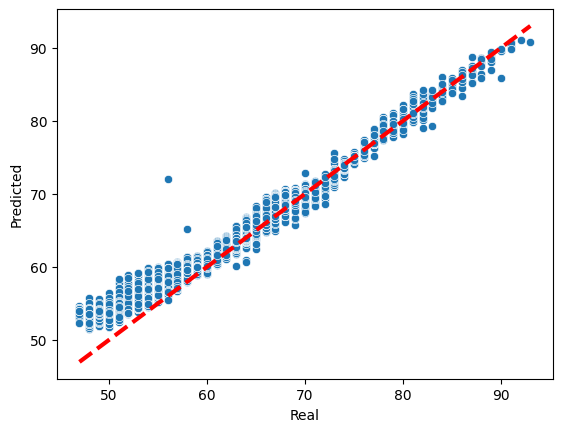

In [ ]:
data = pd.DataFrame({'Real': y_22, 'Predicted': y_pred_22})

sns.scatterplot(data=data, x='Real', y='Predicted')
plt.plot([y_22.min(), y_22.max()], [y_22.min(), y_22.max()], 'r--', lw=3)
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

In [ ]:
best_random_forest.fit(X_train_subset, y_train)

RandomForestRegressor(n_estimators=200)

In [ ]:
y_pred_22 = best_random_forest.predict(X_test_22)

In [ ]:
mae_22 = mean_absolute_error(y_22, y_pred_22)
rmse_22 = np.sqrt(mean_squared_error(y_22, y_pred_22))

print(f"MAE on players_22: {mae_22}")
print(f"RMSE on players_22: {rmse_22}")

MAE on players_22: 0.6475069520245336
RMSE on players_22: 1.1053410638034002


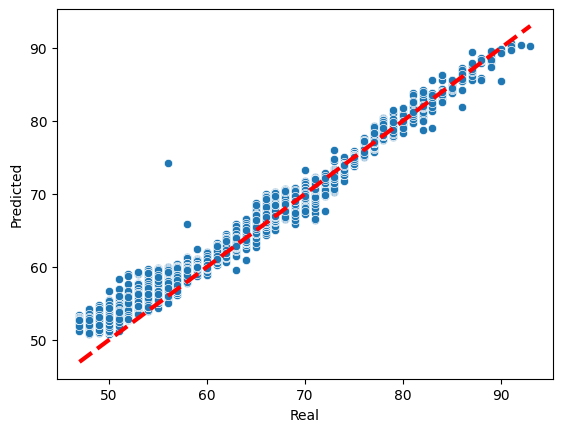

In [ ]:
data = pd.DataFrame({'Real': y_22, 'Predicted': y_pred_22})

sns.scatterplot(data=data, x='Real', y='Predicted')
plt.plot([y_22.min(), y_22.max()], [y_22.min(), y_22.max()], 'r--', lw=3)
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

In [ ]:
best_xgb_model.fit(X_train_subset, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_22 = best_xgb_model.predict(X_test_22)

In [ ]:
mae_22 = mean_absolute_error(y_22, y_pred_22)
rmse_22 = np.sqrt(mean_squared_error(y_22, y_pred_22))

print(f"MAE on players_22: {mae_22}")
print(f"RMSE on players_22: {rmse_22}")

MAE on players_22: 0.9579479360885299
RMSE on players_22: 1.419554551627009


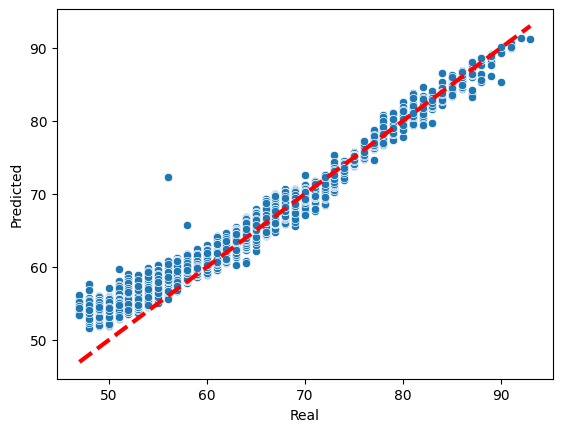

In [ ]:
data = pd.DataFrame({'Real': y_22, 'Predicted': y_pred_22})

sns.scatterplot(data=data, x='Real', y='Predicted')
plt.plot([y_22.min(), y_22.max()], [y_22.min(), y_22.max()], 'r--', lw=3)
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

In [ ]:
best_gradient_boost.fit(X_train_subset, y_train)

GradientBoostingRegressor(max_depth=7, n_estimators=200)

In [ ]:
y_pred_22 = best_gradient_boost.predict(X_test_22)

In [ ]:
mae_22 = mean_absolute_error(y_22, y_pred_22)
rmse_22 = np.sqrt(mean_squared_error(y_22, y_pred_22))

print(f"MAE on players_22: {mae_22}")
print(f"RMSE on players_22: {rmse_22}")

MAE on players_22: 0.8088105251096378
RMSE on players_22: 1.2958496655402574


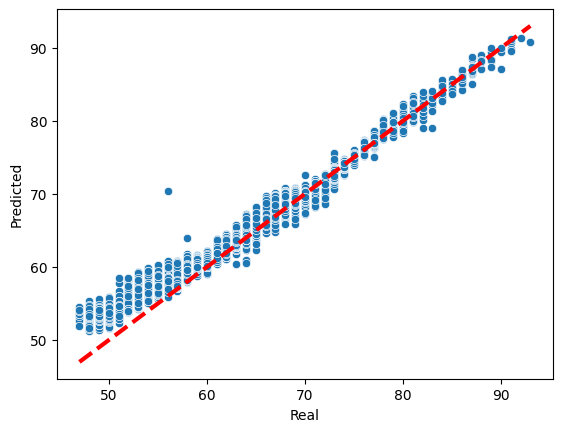

In [ ]:
data = pd.DataFrame({'Real': y_22, 'Predicted': y_pred_22})

sns.scatterplot(data=data, x='Real', y='Predicted')
plt.plot([y_22.min(), y_22.max()], [y_22.min(), y_22.max()], 'r--', lw=3)
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

In [ ]:
with open('top_features_list.pkl', 'wb') as file:
    pickle.dump(top_features_list, file)

In [141]:
joblib.dump(best_random_forest, "model.pkl")

['model.pkl']

In [ ]:
joblib.dump(scaler,'scaler.pkl')

['/content/drive/My Drive/Mid Sem Project/scaler.pkl']

In [140]:
print(type(best_random_forest))

<class 'sklearn.ensemble._forest.RandomForestRegressor'>


# Random Forest provides the best model